In [1]:
#%pip install keras

In [2]:
#%pip install tensorflow

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [16]:
data = pd.read_csv('../data/eeg/filtered_eeg_labelled.csv')

In [17]:
# Split the data into features (X) and the target variable (y):
X = data[['F3', 'F4', 'Fz', 'FCz', 'Cz', 'Pz', 'O1', 'O2']]
y = data['correct']

In [18]:
# Convert the 'correct' column from boolean values to numeric labels (0 and 1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print(y.shape)
print(X.shape)

(61351,)
(61351, 8)


### Here, we attempt to use a random forest classifier.

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
# Random forest classifier
model_forest = RandomForestClassifier()
model_forest.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
# Make predictions on the test set
y_pred = model_forest.predict(X_test)

In [24]:
# Evaluate the model's performance using accuracy:

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8923478119142694


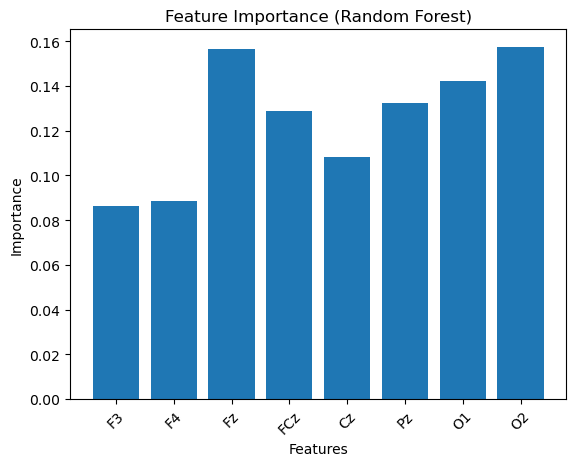

In [25]:
# Random forest feature importance

feature_importance = model_forest.feature_importances_
feature_names = X.columns

plt.bar(feature_names, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.xticks(rotation=45)
plt.show()

In [27]:
# Classification Report
# Prepare test data
y_true = y_test
y_pred = model_forest.predict(X_test)

#Print report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      7094
           1       0.97      0.77      0.86      5177

    accuracy                           0.89     12271
   macro avg       0.91      0.88      0.89     12271
weighted avg       0.90      0.89      0.89     12271



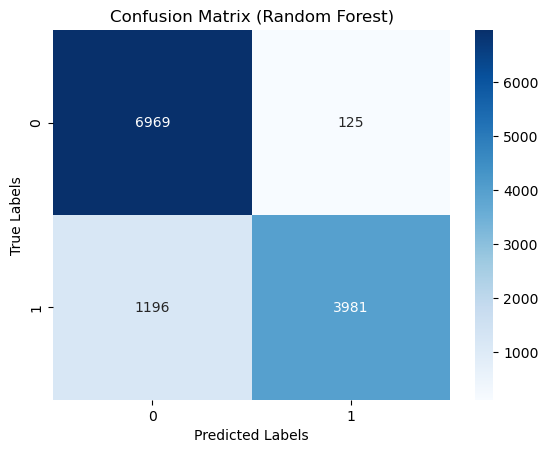

In [28]:
# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix on a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Here, we attempt to use a logistic regression (logit) model.

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
# Train logistic regression model
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

In [31]:
# Make predictions on the test set
logit_pred = logit.predict(X_test)

In [32]:
# Evaluate the model's performance using accuracy:

accuracy_logit = accuracy_score(y_test, logit_pred)
print("Accuracy:", accuracy_logit)

# lower accuracy than random forest

Accuracy: 0.5955504848830576


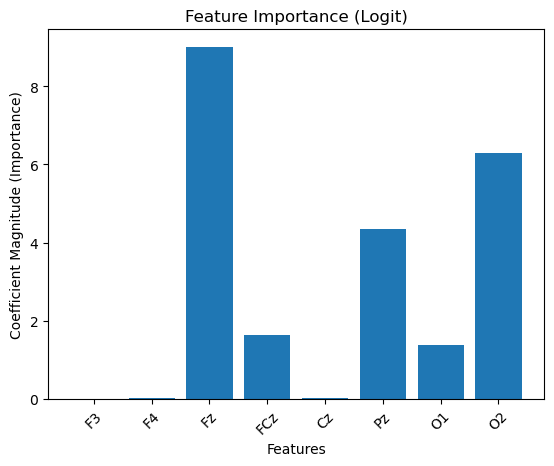

In [33]:
# Logit feature importance
# Get the absolute coefficient values
coefficient_values = np.abs(logit.coef_[0])
feature_names = X.columns

# Plot feature importance
plt.bar(feature_names, coefficient_values)
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude (Importance)')
plt.title('Feature Importance (Logit)')
plt.xticks(rotation=45)
plt.show()

In [35]:
# Classification Report
logit_report = classification_report(y_test, logit_pred)
print("Logistic Regression Report:")
print(logit_report)

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.59      0.99      0.74      7094
           1       0.83      0.05      0.10      5177

    accuracy                           0.60     12271
   macro avg       0.71      0.52      0.42     12271
weighted avg       0.69      0.60      0.47     12271



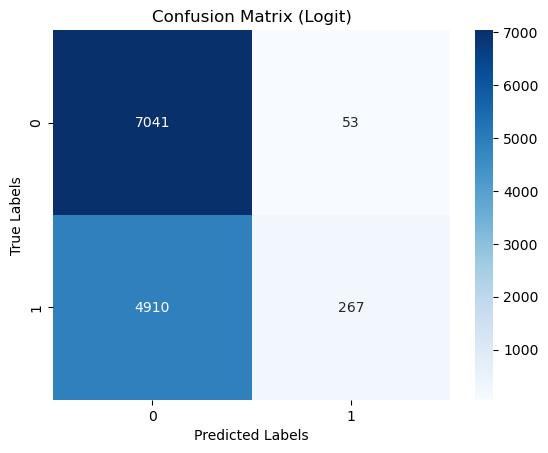

In [36]:
# Calculate confusion matrix
cm_logit = confusion_matrix(y_test, logit_pred)

# Plot the confusion matrix on a heatmap
sns.heatmap(cm_logit, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Logit)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Here, we attempt to use a k-nearest neighbours classifier.

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
# Train kNN classifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [39]:
# Make predictions on the test set
knn_pred = knn.predict(X_test)

In [40]:
# Evaluate the model's performance using accuracy:

accuracy_knn = accuracy_score(y_test, knn_pred)
print("Accuracy:", accuracy_knn)

# Better accuracy than random forest!

Accuracy: 0.9759595794963736


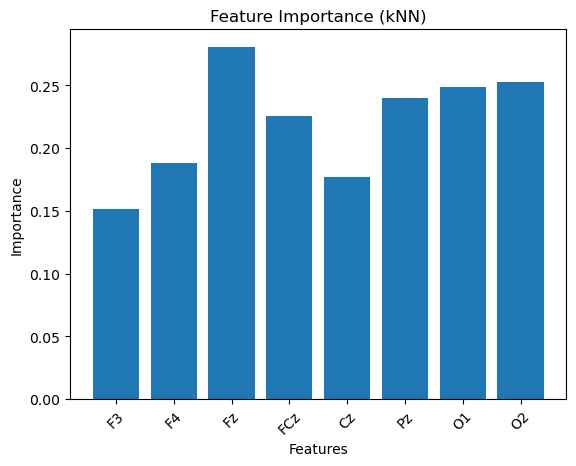

In [41]:
# KNN Feature importance
from sklearn.inspection import permutation_importance

# Calculate feature importance using permutation importance
result = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)
feature_importance = result.importances_mean
feature_names = X.columns

# Plot feature importance
plt.bar(feature_names, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance (kNN)')
plt.xticks(rotation=45)
plt.show()

In [42]:
# Classification report
knn_report = classification_report(y_test, knn_pred)
print("kNN Classifier Report:")
print(knn_report)

kNN Classifier Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7094
           1       0.97      0.97      0.97      5177

    accuracy                           0.98     12271
   macro avg       0.98      0.98      0.98     12271
weighted avg       0.98      0.98      0.98     12271



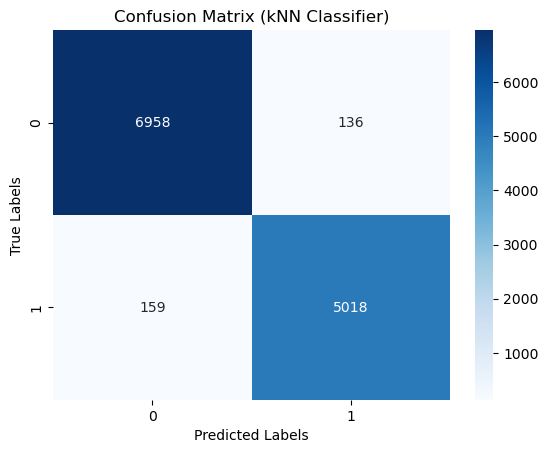

In [43]:
# Calculate confusion matrix
cm_knn = confusion_matrix(y_test, knn_pred)

# Plot the confusion matrix on a heatmap
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (kNN Classifier)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Here, we attempt to use a multilayer perceptron classifier.

In [44]:
from sklearn.neural_network import MLPClassifier

In [45]:
# Train MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, random_state=1)

In [46]:
# Make predictions on the test set
mlp_pred = mlp.predict(X_test)

In [47]:
# Evaluate the model's performance using accuracy:

accuracy_mlp = accuracy_score(y_test, mlp_pred)
print("Accuracy:", accuracy_mlp)

# Worst accuracy than random forest and kNN! Only slightly better than logit...

Accuracy: 0.6984760818189226


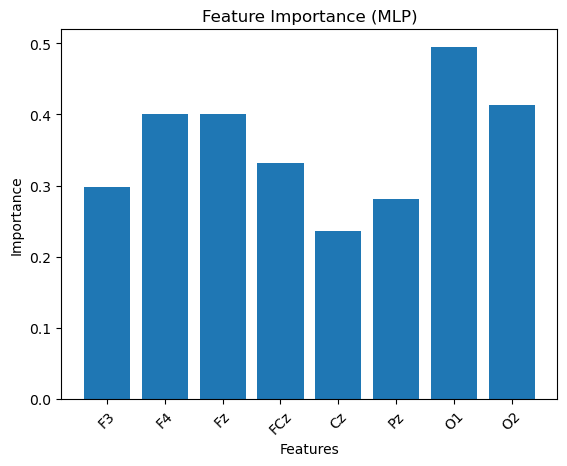

In [48]:
# MLP Feature importance
# Get the weights connecting the input layer to the first hidden layer
weights = mlp.coefs_[0]

# Calculate the average absolute weight for each feature
feature_importance = np.mean(np.abs(weights), axis=1)
feature_names = X.columns

plt.bar(feature_names, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance (MLP)')
plt.xticks(rotation=45)
plt.show()

In [49]:
# Classification report
mlp_report = classification_report(y_test, mlp_pred)
print("MLP Classifier Report:")
print(mlp_report)

MLP Classifier Report:
              precision    recall  f1-score   support

           0       0.66      1.00      0.79      7094
           1       0.98      0.29      0.45      5177

    accuracy                           0.70     12271
   macro avg       0.82      0.64      0.62     12271
weighted avg       0.79      0.70      0.65     12271



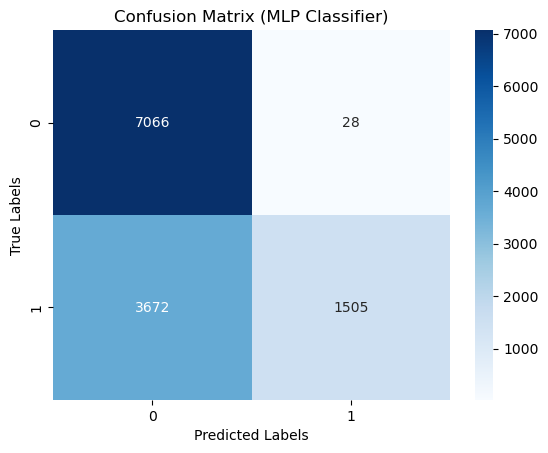

In [50]:
# Calculate confusion matrix
cm_mlp = confusion_matrix(y_test, mlp_pred)

# Plot the confusion matrix on a heatmap
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (MLP Classifier)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

We can also try using Tensorflow and Keras as below. (Untested)

In [51]:
from keras.models import Sequential
from keras.layers import Dense

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# creating instance of one-hot-encoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np
enc = OneHotEncoder(handle_unknown='ignore')
y_onehot = enc.fit_transform(np.array(y).reshape(-1, 1))
# turn the sparse matrix into a pandas dataframe
y = pd.DataFrame(y_onehot.toarray())
display(y[:10])

In [ ]:
# Initialise model
model_mlp = Sequential()
model_mlp.add(Dense(50 , input_dim = 675, kernel_initializer="uniform", activation = 'relu')) # input layer
model_mlp.add(Dense(30, kernel_initializer="uniform", activation = 'relu')) # hidden layer
model_mlp.add(Dense(len(categories), activation = 'softmax')) # output layer
model_mlp.summary()

In [ ]:
# Compile model
model_mlp.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Train
history = model_mlp.fit(X_train, y_train, batch_size = 10, epochs = 10, validation_split = 0.2)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(history.history['loss'], color='m')
plt.plot(history.history['val_loss'], color='c')
plt.title('MLP loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')

sns.despine(offset=5)

plt.show()